In [ ]:
Questions

1. Sports / career popularity ?
2. Decrease / Increase of edit per month / year to edits
3. Number of edits by month

In [2]:
import pandas as pd
import numpy 

In [3]:
df_celebs = pd.read_csv("../input/forbes_celebrity_list.csv")
df_edits = pd.read_csv("../input/wikipedia_edits.csv")

In [4]:
df_celebs.head()

,year,rank,recipient,country,career,tied,title
0,1999,1,Michael Jordan,United States,Sportsperson (Basketball),0,Michael_Jordan
1,1999,2,Oprah Winfrey,United States,Television Personality,0,Oprah_Winfrey
2,1999,3,Leonardo DiCaprio,United States,Actor,0,Leonardo_DiCaprio
3,1999,4,Jerry Seinfeld,United States,Actor,0,Jerry_Seinfeld
4,1999,5,Steven Spielberg,United States,Filmmaker,0,Steven_Spielberg


In [5]:
df_edits.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied
0,50_Cent,858765697,858858564,2018-09-10T02:52:25Z,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0
1,50_Cent,858673799,858765697,2018-09-09T13:11:00Z,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0
2,50_Cent,858673121,858673799,2018-09-08T21:46:42Z,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0
3,50_Cent,858673016,858673121,2018-09-08T21:39:37Z,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0
4,50_Cent,858469414,858673016,2018-09-08T21:38:24Z,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0


In [7]:
df_celebs['recipient'].value_counts()

Oprah Winfrey         16
Tiger Woods           12
Steven Spielberg      11
Tom Cruise             6
Madonna                6
                      ..
Celine Dion            1
David Beckham          1
Rush Limbaugh          1
James Cameron          1
Sean 'Diddy' Combs     1
Name: recipient, Length: 82, dtype: int64

In [12]:
df_edits['career'].value_counts()

Musician                               213081
Musicians                              181184
Actor                                  146121
Sportsperson (Basketball)               48464
Television Personality                  36792
Sportsperson (Association Football)     27622
Sportsperson (Tennis)                   24641
Filmmaker                               20085
Athlete (Association football)          16272
Author                                  13884
Musician / Actor                        13146
Sportsperson (Golf)                      9026
Sportsperson (Boxing)                    8917
Radio Personality                        8685
Athlete (Boxing)                         7969
Actors                                   7636
Personality                              5818
Name: career, dtype: int64

In [ ]:
## Identify which field for writers are best to focus on?

# Show trend for a single career - number of edits

In [92]:
df_golf = df_edits[(df_edits['career'] == 'Sportsperson (Golf)')]
df_golf.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied
750342,Tiger_Woods,857750021,858229064,2018-09-05T20:52:26Z,GreenC bot,27823944.0,155334,Tiger Woods,2008,2,United States,Sportsperson (Golf),0
750343,Tiger_Woods,857749715,857750021,2018-09-02T19:41:46Z,Wyn.junior,20131735.0,155358,Tiger Woods,2008,2,United States,Sportsperson (Golf),0
750344,Tiger_Woods,857022160,857749715,2018-09-02T19:39:39Z,Wyn.junior,20131735.0,155358,Tiger Woods,2008,2,United States,Sportsperson (Golf),0
750345,Tiger_Woods,856562447,857022160,2018-08-29T01:42:05Z,Aoa8212,402703.0,155354,Tiger Woods,2008,2,United States,Sportsperson (Golf),0
750346,Tiger_Woods,856562065,856562447,2018-08-26T03:13:08Z,Kind Tennis Fan,19339494.0,155354,Tiger Woods,2008,2,United States,Sportsperson (Golf),0


In [20]:
df_golf['date'] = pd.to_datetime(df_golf['timestamp'])

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_golf['year'] = df_golf['date'].dt.year
df_golf['month'] = df_golf['date'].dt.month

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
c_golf = df_golf.groupby(['career', 'year', 'month'])['revid'].agg([len])
c_golf.reset_index(inplace=True)

In [52]:
c_golf

,career,year,month,len
0,Sportsperson (Golf),2002,3,3
1,Sportsperson (Golf),2002,6,2
2,Sportsperson (Golf),2002,8,2
3,Sportsperson (Golf),2002,12,1
4,Sportsperson (Golf),2003,1,1
...,...,...,...,...
182,Sportsperson (Golf),2018,5,3
183,Sportsperson (Golf),2018,6,7
184,Sportsperson (Golf),2018,7,24
185,Sportsperson (Golf),2018,8,35


In [58]:
c_golf['month']

0       3
1       6
2       8
3      12
4       1
       ..
182     5
183     6
184     7
185     8
186     9
Name: month, Length: 187, dtype: int64

In [108]:
c_golf['yearmo'] = c_golf['year'].astype(str).str.cat(c_golf['month'].astype(str)) # df.Year.str.cat(df.quarter)

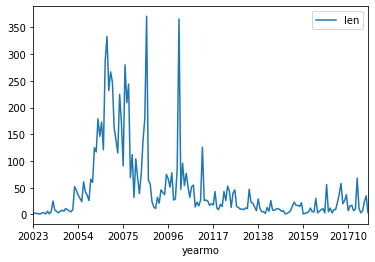

In [110]:
c_golf[['yearmo', 'len']].plot(kind="line", x="yearmo", y="len")

In [72]:
df_bball = df_edits[(df_edits['career'] == 'Sportsperson (Basketball)')]

In [79]:
df_bball['date'] = pd.to_datetime(df_bball['timestamp'])
df_bball['year'] = df_bball['date'].dt.year
df_bball['month'] = df_bball['date'].dt.month

c_bball = df_bball.groupby(['career', 'year', 'month'])['revid'].agg([len])
c_bball

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

len
career                    year month     
Sportsperson (Basketball) 2001 11       1
                          2002 2        1
                               9        3
                               11       2
                          2003 1       12
...                                   ...
                          2018 5      210
                               6      112
                               7      280
                               8      127
                               9       29

[192 rows x 1 columns]

In [101]:
c_bball.reset_index(inplace=True)

In [102]:
c_bball['yearmo'] = c_bball['year'].astype(str).str.cat(c_bball['month'].astype(str)) # df.Year.str.cat(df.quarter)

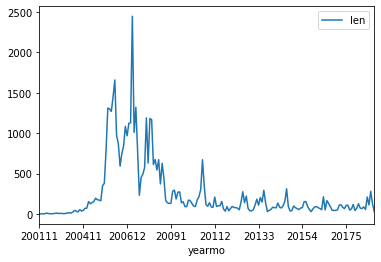

In [103]:
c_bball['len2'] = c_bball['len'] / 4
c_bball[['yearmo', 'len']].plot(kind="line", x="yearmo", y="len")

In [93]:
df_golf['title'].value_counts()

Tiger_Woods    9026
Name: title, dtype: int64

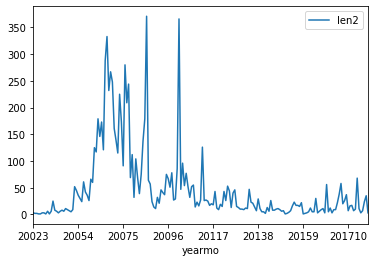

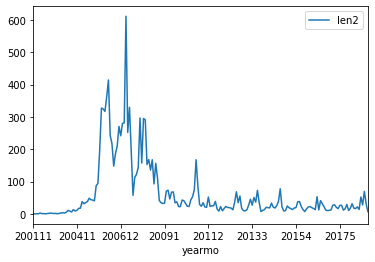

In [113]:
c_golf['len2'] = c_golf['len'] / 1
c_bball['len2'] = c_bball['len'] / 4

c_golf[['yearmo', 'len2']].plot(kind="line", x="yearmo", y="len2")
c_bball[['yearmo', 'len2']].plot(kind="line", x="yearmo", y="len2")

In [115]:
df_edits['career'].value_counts()

Musician                               213081
Musicians                              181184
Actor                                  146121
Sportsperson (Basketball)               48464
Television Personality                  36792
Sportsperson (Association Football)     27622
Sportsperson (Tennis)                   24641
Filmmaker                               20085
Athlete (Association football)          16272
Author                                  13884
Musician / Actor                        13146
Sportsperson (Golf)                      9026
Sportsperson (Boxing)                    8917
Radio Personality                        8685
Athlete (Boxing)                         7969
Actors                                   7636
Personality                              5818
Name: career, dtype: int64

In [122]:
df_edits['date'] = pd.to_datetime(df_edits['timestamp'])
df_edits['month'] = df_edits['date'].dt.month
df_edits['year'] = df_edits['date'].dt.year

In [142]:
# cym = df_edits.groupby(['career', 'title', 'year', 'month'])['revid'].agg([len])
cym = df_edits.groupby(['career', 'year', 'month'])['revid'].agg([len])

In [143]:
cym.reset_index(inplace=True)
cym['yearmo'] = cym['year'].astype(str).str.cat(cym['month'].astype(str))
cym.sort_values(by=['yearmo'], ascending=True)
cym.head()

,career,year,month,len,yearmo
0,Actor,2001,10,2,200110
1,Actor,2001,12,1,200112
2,Actor,2002,1,18,20021
3,Actor,2002,2,7,20022
4,Actor,2002,3,28,20023


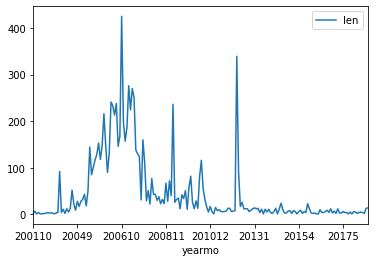

In [145]:
cym[cym['career'] == 'Radio Personality'].plot(x="yearmo", y="len")

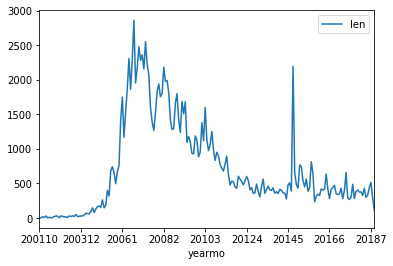

In [146]:
cym[cym['career'] == 'Actor'].plot(x="yearmo", y="len")